In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 120)

In [11]:
df = pd.read_csv('./Data/grades.csv')

In [12]:
df.head()

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,01/03/17-15:27:49


In [13]:
df.submit_time = pd.to_datetime(df.submit_time)

In [14]:
df.head()

,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,2017-01-03 20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,2017-01-03 20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,2017-01-03 22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,2017-01-02 21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,2017-01-03 15:27:49


In [21]:
df['hour'] = df.submit_time.dt.hour
df['minutes'] = df.submit_time.dt.minute
df['day'] = df.submit_time.dt.day
df['month'] = df.submit_time.dt.month
df['year'] = df.submit_time.dt.year

In [23]:
df['file_format'] = df.submission.apply(lambda x: x[-3:])

In [24]:
df.head()

,submission,submit_time,hour,minutes,day,month,year,file_format
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,2017-01-03 20:28:52,20,28,3,1,2017,zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,2017-01-03 20:18:21,20,18,3,1,2017,zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,2017-01-03 22:37:08,22,37,3,1,2017,zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,2017-01-02 21:43:19,21,43,2,1,2017,zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,2017-01-03 15:27:49,15,27,3,1,2017,zip


In [27]:
len(df)

198

In [33]:
file_format_counts = df.groupby('file_format')['submission'].count().reset_index()

In [34]:
file_format_counts

,file_format,submission
0,.7z,2
1,3.R,1
2,4.R,1
3,5.R,1
4,6.R,3
5,9.R,1
6,zip,189


In [37]:
file_format_counts['perc_of_total'] = (file_format_counts.submission / len(df))*100

In [38]:
file_format_counts

,file_format,submission,perc_of_total
0,.7z,2,1.010101
1,3.R,1,0.505051
2,4.R,1,0.505051
3,5.R,1,0.505051
4,6.R,3,1.515152
5,9.R,1,0.505051
6,zip,189,95.454545


In [39]:
df.head()

,submission,submit_time,hour,minutes,day,month,year,file_format
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,2017-01-03 20:28:52,20,28,3,1,2017,zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,2017-01-03 20:18:21,20,18,3,1,2017,zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,2017-01-03 22:37:08,22,37,3,1,2017,zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,2017-01-02 21:43:19,21,43,2,1,2017,zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,2017-01-03 15:27:49,15,27,3,1,2017,zip


In [43]:
post_first_deadline = df[df.submit_time > '2017-01-03 23:59:59']

In [45]:
post_first_deadline.head()

,submission,submit_time,hour,minutes,day,month,year,file_format
5,https://ckd.upgrad.com/UpGrad/0ab308ab-2b3a-4c74-9bac-c12567a04754/DDA1610059.zip,2017-01-04 02:43:46,2,43,4,1,2017,zip
7,https://ckd.upgrad.com/UpGrad/d8969806-6760-4428-a861-545fb4aff136/DDA1610042.zip,2017-01-09 23:49:09,23,49,9,1,2017,zip
11,https://ckd.upgrad.com/UpGrad/873211b9-5a3q-4510-91cb-awqbd210a7f/DDA1610008.zip,2017-01-09 23:41:23,23,41,9,1,2017,zip
16,https://ckd.upgrad.com/UpGrad/f0c04fba-56d2-4ac5-bcaa-f355a9324c07/DDA1610262.zip,2017-01-04 01:43:43,1,43,4,1,2017,zip
21,https://ckd.upgrad.com/UpGrad/7cbc35aa-1d5c-4d17-b669-5bb9ab5b2f3c/DDA1610234.zip,2017-01-09 23:59:21,23,59,9,1,2017,zip


In [47]:
post_first_deadline.shape

(44, 8)

In [48]:
df['date'] = df.submit_time.dt.date

In [49]:
df.head()

,submission,submit_time,hour,minutes,day,month,year,file_format,date
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b02/DDA1610095.zip,2017-01-03 20:28:52,20,28,3,1,2017,zip,2017-01-03
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d4/DDA1610288.zip,2017-01-03 20:18:21,20,18,3,1,2017,zip,2017-01-03
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-4342-aa95-a7018ff93150/DDA1610106.zip,2017-01-03 22:37:08,22,37,3,1,2017,zip,2017-01-03
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669c/DDA1610261.zip,2017-01-02 21:43:19,21,43,2,1,2017,zip,2017-01-02
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8f/DDA1610028.zip,2017-01-03 15:27:49,15,27,3,1,2017,zip,2017-01-03


In [51]:
df.groupby('date')[['submission']].count()

,submission
date,
2016-11-19,1
2016-12-19,1
2016-12-21,1
2016-12-28,2
2016-12-29,2
2016-12-30,6
2016-12-31,1
2017-01-01,6
2017-01-02,14


In [55]:
submission_by_hour = df.groupby('hour')[['submission']].count().reset_index()

In [56]:
submission_by_hour

,hour,submission
0,0,10
1,1,8
2,2,2
3,3,3
4,4,2
5,6,1
6,8,1
7,9,1
8,10,3
9,11,1


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

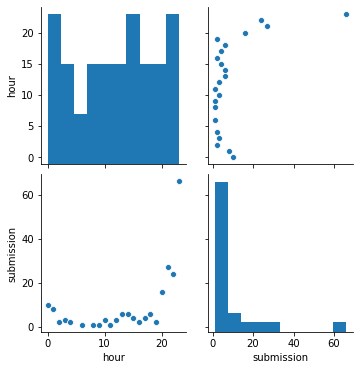

In [60]:
sns.pairplot(submission_by_hour)

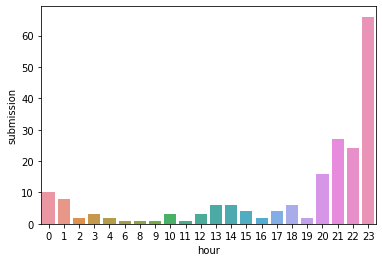

In [73]:
sns.barplot(submission_by_hour.hour,submission_by_hour.submission)
plt.show()